Servo Prediction Using Linear Regression

Import Library

In [4]:
import pandas as pd

In [1]:
import numpy as np

Import CSV as DataFrame

In [5]:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Servo%20Mechanism.csv')

Get the First Five Rows of Dataframe

In [6]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


Get Information Of **Dataframe**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [8]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [9]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [10]:
df.shape

(167, 5)

In [11]:
df[['Motor']].value_counts()

,count
Motor,
C,40
A,36
B,36
E,33
D,22


In [13]:
df[['Screw']].value_counts()

,count
Screw,
A,42
B,35
C,31
D,30
E,29


GET ENCODING OF CATEGORICAL FEATURES

In [20]:
df.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace = True)

In [22]:
df.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace = True)

**Define y(dependent or label or target variable) and x(independent or features or attribute variable**

In [24]:
y =df['Class']

In [25]:
y.shape

(167,)

In [26]:
y

,Class
0,4
1,11
2,6
3,48
4,6
...,...
162,44
163,40
164,25
165,44


In [28]:
x = df[['Motor','Screw','Pgain','Vgain']]

In [29]:
x = df.drop('Class',axis=1)

In [31]:
x.shape

(167, 4)

In [32]:
x

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


**get train test split**

In [34]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=2529)

In [38]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((116, 4), (51, 4), (116,), (51,))

**Get Model Train**

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lr = LinearRegression()

In [43]:
lr.fit(x_train,y_train)

LinearRegression()

**Get Model Prediction**

In [44]:
y_pred = lr.predict(x_test)

In [45]:
y_pred.shape

(51,)

In [46]:
y_pred

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

Get model Evaluataion

In [47]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [48]:
mean_squared_error(y_test,y_pred)

66.03589175595563

In [ ]:
mean_absolute_error

In [ ]:
r2_score(y_test,y_pred)

Get Visualization of Actual Vs predicted Results

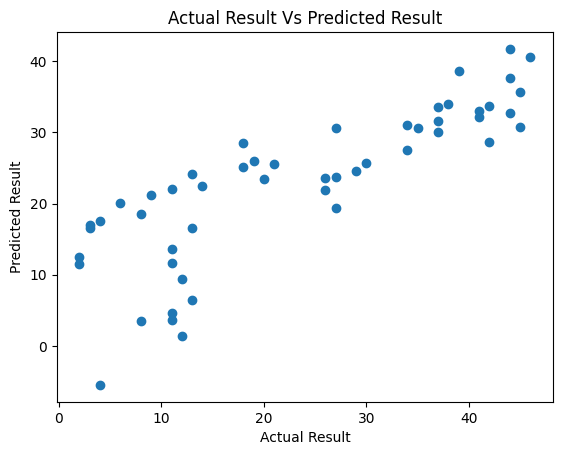

In [50]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Result')
plt.ylabel('Predicted Result')
plt.title('Actual Result Vs Predicted Result')
plt.show()

**Get Future Predictions**

**Lets select a random sample from existing dataset as new value**

steps to follow:

1.Extract a random row using sample fuction
2.separate x and y
3.standardize x
4.predict


In [51]:
x_new = df.sample(1)

In [53]:
x_new

,Motor,Screw,Pgain,Vgain,Class
2,3,3,4,3,6


In [54]:
x_new.shape

(1, 5)

In [55]:
x_new = x_new.drop('Class',axis=1)

In [56]:
x_new

,Motor,Screw,Pgain,Vgain
2,3,3,4,3


In [57]:
x_new.shape

(1, 4)

In [59]:
y_pred_new = lr.predict(x_new)

In [60]:
y_pred_new

array([19.5842296])